#PyAstrOFit: the orbit module

We present here the methods related to the -orbit- module, part of the PyAstrOFit package. Futhermore, this notebook constitutes a how-to-use illustrated with several examples.

### Import

In [1]:
import PyAstrOFit.Orbit as o
import numpy as np

%matplotlib inline

Check the dependencies ...
+ The numpy package is installed.
+ The matplotlib package is installed.
+ The astropy package is installed.
+ The emcee package is installed.


###Instanciate an orbit object

We will create a planet orbit, in this case $\beta$ Pic b. To define a planet orbit, we need 6 parameters, for example the Kepler elements. One also need the mass of the star and its distance to the Earth: 

In [2]:
a = 8.42        #[A.U.]
e = 0.07
i = 89.04       #[deg]
node = 31.87    #[deg]
w = 338.25      #[deg]
tp = 2452353.32 #[JD]

starMass = 1.75     #[solar mass]
starDistance = 19.3 #[pc]

In [3]:
betapicb = o.Orbit(semiMajorAxis = a,
                   eccentricity = e,
                   inclinaison = i,
                   longitudeAscendingNode = node,
                   periastron = w,
                   periastronTime = tp,
                   dStar = starDistance,
                   starMass = starMass)

###Visualize the orbit

The method -showOrbit- allows to vizualize the full planet orbit. Several options are available. Let's discover them step by step.

####Simple representation

First, we can just display the full orbit.

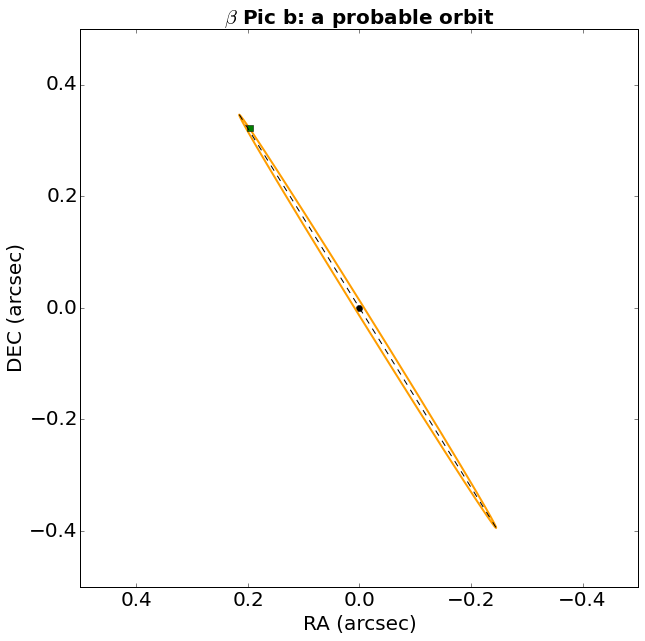

In [4]:
betapicb.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'$\beta$ Pic b: a probable orbit',20])

####Position at specific observation dates

Now, we can depict particular points on the orbit, corresponding to specific observation dates. This information can be retreived from the file 'betaPicb.txt' (included in the package resource folder) which contains the most recent observational data. For that, we use the method getInfo( ) from the module PyAstrOFit.FileHandler. We then display the planet orbit and zoom on a small region of interest. 

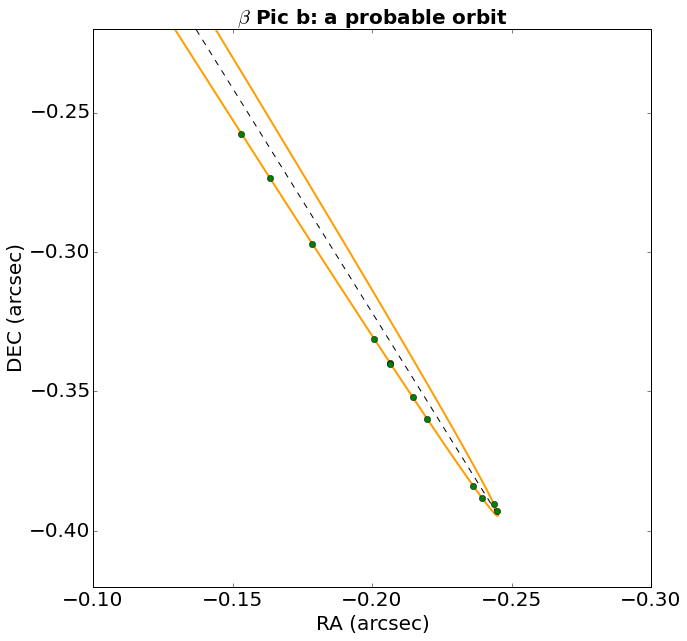

In [5]:
import PyAstrOFit.FileHandler as f
fileh = f.FileHandler('PyAstrOFit/res/exo/betaPicb.txt')
observation_dates = fileh.getInfo()[0]['timePosition']

betapicb.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'$\beta$ Pic b: a probable orbit',20],
                   addPosition = observation_dates,
                   lim = [[-0.30,-0.10],[-0.42,-0.22]])

####Adding observational data

To this figure, we can represent observational data with their associated error bars. This information can also be retreived from the file 'betaPicb.txt'. Furthermore, by setting the attribut -link- to True, we link the observed positions with the modeled positions at specific observation dates.  

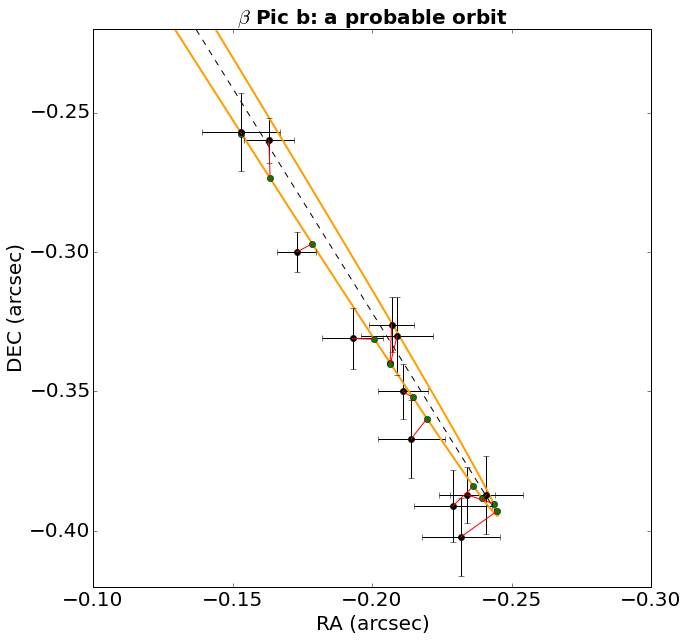

In [6]:
import PyAstrOFit.FileHandler as f
fileh = f.FileHandler('PyAstrOFit/res/exo/betaPicb.txt')
data_RA = fileh.getInfo()[0]['raPosition']
err_RA = fileh.getInfo()[1]['raError']
data_DEC = fileh.getInfo()[0]['decPosition']
err_DEC = fileh.getInfo()[1]['decError']

betapicb.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'$\beta$ Pic b: a probable orbit',20],
                   addPosition = observation_dates,
                   lim = [[-0.30,-0.10],[-0.42,-0.22]],
                   addPoints = [data_RA,data_DEC,err_RA,err_DEC],
                   link = True)

####Saving the figure

Now, it's time to save our figure into a PDF file. For that, we modify the attribut save = (True,file_name). 

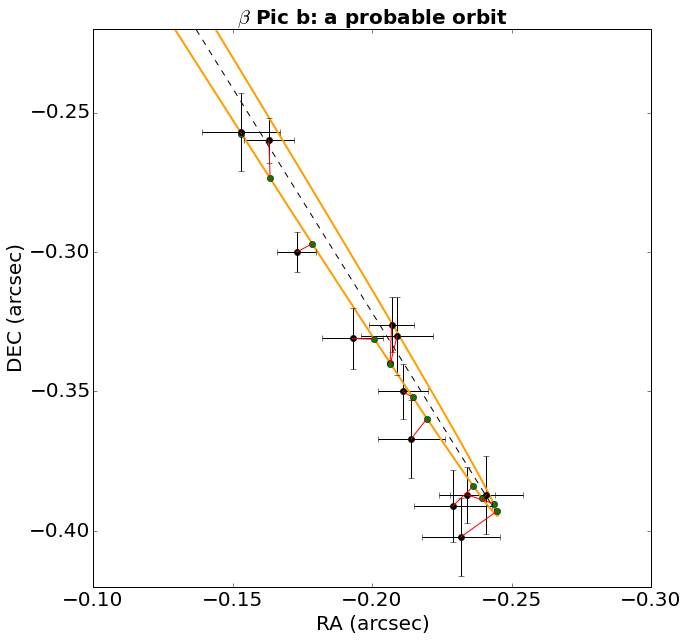

In [7]:
file_name = 'betaPicb_test'
betapicb.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'$\beta$ Pic b: a probable orbit',20],
                   addPosition = observation_dates,
                   lim = [[-0.30,-0.10],[-0.42,-0.22]],
                   addPoints = [data_RA,data_DEC,err_RA,err_DEC],
                   link = True,
                   save = (True,file_name))

###Model Parameters and other quantities

We can get the Kepler elements by using the method whichParameters( ). If it was not initially give, the period is now returns.

In [8]:
p = betapicb.whichParameters()
for key in p.keys():
    print '{} = {}'.format(key,p[key])

eccentricity = 0.07
longitudeAscendingNode = 0.556236432611
semiMajorAxis = 8.42
starMass = 1.75
periatronTime = 2452353.32
period = 18.4796732703
inclinaison = 1.55404116598
periastron = 5.90357619487


The True anomaly $\nu$ of an orbit point, given the time at position.

In [9]:
trueAnomalies = [betapicb.trueAnomaly(date) for date in observation_dates ]
for k,nu in enumerate(trueAnomalies):
    print 'True anomaly corresponding to position {} = {}'.format(k,nu)

True anomaly corresponding to position 0 = 0.639179327729
True anomaly corresponding to position 1 = 2.6547292957
True anomaly corresponding to position 2 = 2.70831512019
True anomaly corresponding to position 3 = 2.79204992047
True anomaly corresponding to position 4 = 2.93166816717
True anomaly corresponding to position 5 = 2.97154625835
True anomaly corresponding to position 6 = 2.97235964394
True anomaly corresponding to position 7 = 3.03413379532
True anomaly corresponding to position 8 = 3.07717462647
True anomaly corresponding to position 9 = 3.26065218654
True anomaly corresponding to position 10 = 3.31349302612
True anomaly corresponding to position 11 = 3.57510000551
True anomaly corresponding to position 12 = 3.63040738315


The time at position $t$, given the true anomaly $\nu$.

In [13]:
time_at_position = [betapicb.timeFromTrueAnomaly(nu,'iso') for nu in trueAnomalies]

Determination of the $\chi^2$ 

In [11]:
chi2 = betapicb.chiSquare(obs = fileh.getInfo()[0],
                          error = fileh.getInfo()[1])
print 'The non-reduced chi^2 equals {}'.format(chi2)

The non-reduced chi^2 equals 11.2659588451


###Example: a more complete code for HR8799e

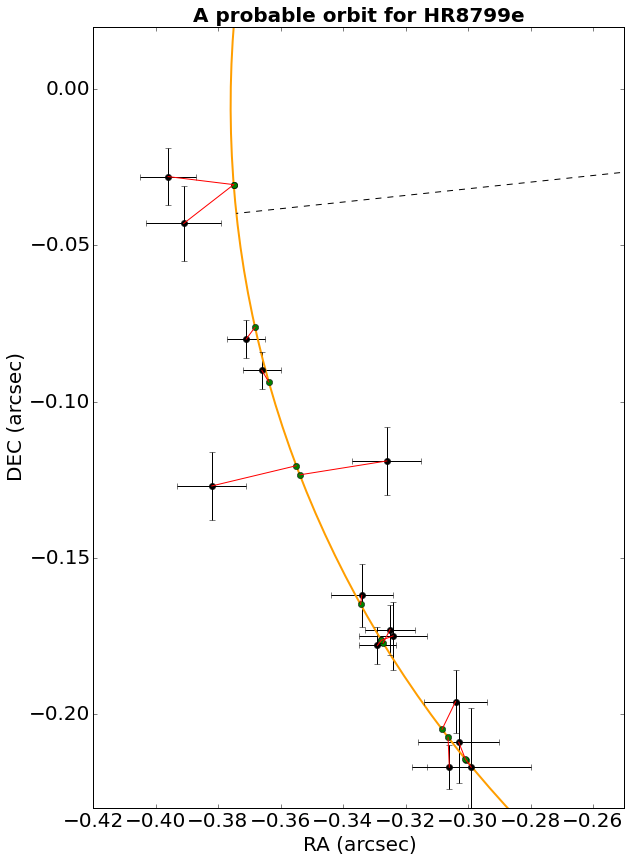

In [12]:
import PyAstrOFit.Orbit as o
import PyAstrOFit.FileHandler as f

%matplotlib inline

a = 14.81        #[A.U.]
e = 0.001
i = 21.38       #[deg]
node = 83.93    #[deg]
w = 0.001      #[deg]
tp = 2448045.7916666665 #[JD]

starMass = 1.51     #[solar mass]
starDistance = 39.4 #[pc]

planet = o.Orbit(semiMajorAxis = a,
                   eccentricity = e,
                   inclinaison = i,
                   longitudeAscendingNode = node,
                   periastron = w,
                   periastronTime = tp,
                   dStar = starDistance,
                   starMass = starMass)


fileh = f.FileHandler('PyAstrOFit/res/exo/hr8799e.txt')
observation_dates = fileh.getInfo()[0]['timePosition']
data_RA = fileh.getInfo()[0]['raPosition']
err_RA = fileh.getInfo()[1]['raError']
data_DEC = fileh.getInfo()[0]['decPosition']
err_DEC = fileh.getInfo()[1]['decError']

planet.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (14,14), 
                   title = ['A probable orbit for HR8799e',20],
                   addPosition = observation_dates,
                   lim = [[-0.25,-0.42],[-0.23,0.02]],
                   addPoints = [data_RA,data_DEC,err_RA,err_DEC],
                   link = True)